# Targets with low accuracy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 150
sns.set(style='darkgrid')
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)
from pathlib import Path
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.size"] = 15
plt.rcParams['figure.figsize'] = (6, 4)
from scipy import stats

In [2]:
data_dir = Path('../../../../../data/')
dataset_dir = data_dir / 'out' / 'dataset'
subset_name = 'target_subset_' + Path('.').resolve().parent.name
score_dir = dataset_dir / 'score' / 'subsets' / subset_name
assert score_dir.exists()
fig_dir = score_dir / 'fig' / 'accuracy'
fig_dir.mkdir(parents=True, exist_ok=True)
target_list = data_dir / 'interim' / f'{subset_name}.csv'
assert target_list.exists()

In [3]:
label_path = score_dir / 'label.csv'
label_df = pd.read_csv(label_path, index_col=0)
target_df = pd.read_csv(target_list, index_col=0)
df = pd.merge(label_df, target_df, left_on='Target', right_on='id', how='left')
df

,Model,TMscore,GDT_TS,GDT_HA,Global_LDDT,Mean_LDDT,pLDDT,pTMscore,Tolerance,ModelName,...,Length,id,resolution,releasedate,header,sequence,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2
0,model_1_ptm_seed_0_rec_10_ens_1,0.829,0.791,0.725,0.858,0.858,0.897,0.855,0.422,model_1_ptm,...,564,5WM2_A,1.548,2018-05-23T00:00:00Z,>5wm2_A mol:protein length:564 Salicylate-AMP...,MGSSHHHHHHSSGLVPRGSHMLDGWVPWPESFARRYRAAGYWEGRP...,564,24,10,True
1,model_1_ptm_seed_0_rec_1_ens_1,0.830,0.795,0.733,0.864,0.864,0.905,0.875,36.027,model_1_ptm,...,564,5WM2_A,1.548,2018-05-23T00:00:00Z,>5wm2_A mol:protein length:564 Salicylate-AMP...,MGSSHHHHHHSSGLVPRGSHMLDGWVPWPESFARRYRAAGYWEGRP...,564,24,10,True
2,model_1_ptm_seed_0_rec_2_ens_1,0.830,0.793,0.733,0.862,0.862,0.900,0.863,7.015,model_1_ptm,...,564,5WM2_A,1.548,2018-05-23T00:00:00Z,>5wm2_A mol:protein length:564 Salicylate-AMP...,MGSSHHHHHHSSGLVPRGSHMLDGWVPWPESFARRYRAAGYWEGRP...,564,24,10,True
3,model_1_ptm_seed_0_rec_3_ens_1,0.830,0.793,0.735,0.862,0.862,0.895,0.851,0.720,model_1_ptm,...,564,5WM2_A,1.548,2018-05-23T00:00:00Z,>5wm2_A mol:protein length:564 Salicylate-AMP...,MGSSHHHHHHSSGLVPRGSHMLDGWVPWPESFARRYRAAGYWEGRP...,564,24,10,True
4,model_1_ptm_seed_0_rec_4_ens_1,0.830,0.791,0.732,0.860,0.860,0.898,0.859,1.855,model_1_ptm,...,564,5WM2_A,1.548,2018-05-23T00:00:00Z,>5wm2_A mol:protein length:564 Salicylate-AMP...,MGSSHHHHHHSSGLVPRGSHMLDGWVPWPESFARRYRAAGYWEGRP...,564,24,10,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106795,model_5_seed_1_rec_7_ens_8,0.928,0.933,0.877,0.895,0.872,0.860,NaN,0.135,model_5,...,137,6SAN_A,1.360,2020-03-18T00:00:00Z,>6san_A mol:protein length:137 Deleted in mal...,MKLCILLAVVAFVGLSLGGSESSLALRLVNGGDRCQGRVEVLYQGS...,137,4,4,False
106796,model_5_seed_1_rec_8_ens_1,0.929,0.935,0.879,0.895,0.872,0.859,NaN,0.335,model_5,...,137,6SAN_A,1.360,2020-03-18T00:00:00Z,>6san_A mol:protein length:137 Deleted in mal...,MKLCILLAVVAFVGLSLGGSESSLALRLVNGGDRCQGRVEVLYQGS...,137,4,4,False
106797,model_5_seed_1_rec_8_ens_8,0.928,0.933,0.875,0.896,0.873,0.860,NaN,0.130,model_5,...,137,6SAN_A,1.360,2020-03-18T00:00:00Z,>6san_A mol:protein length:137 Deleted in mal...,MKLCILLAVVAFVGLSLGGSESSLALRLVNGGDRCQGRVEVLYQGS...,137,4,4,False
106798,model_5_seed_1_rec_9_ens_1,0.928,0.933,0.879,0.896,0.873,0.861,NaN,0.435,model_5,...,137,6SAN_A,1.360,2020-03-18T00:00:00Z,>6san_A mol:protein length:137 Deleted in mal...,MKLCILLAVVAFVGLSLGGSESSLALRLVNGGDRCQGRVEVLYQGS...,137,4,4,False


## Targets with low maximum GDT_TS

In [4]:
label = 'GDT_TS'
target_num = 20
gdtts_max_df = df.groupby('Target').apply(lambda x: x.loc[x[label].idxmax()]).sort_values(label)
display(gdtts_max_df.head(target_num))
sample_targets_low_max_gdtts = gdtts_max_df.head(target_num).index.to_list()

,Model,TMscore,GDT_TS,GDT_HA,Global_LDDT,Mean_LDDT,pLDDT,pTMscore,Tolerance,ModelName,...,Length,id,resolution,releasedate,header,sequence,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2
Target,,,,,,,,,,,,,,,,,,,,,
6JDR_A,model_4_seed_1_rec_1_ens_1,0.511,0.424,0.344,0.807,0.795,0.908,NaN,35.249,model_4,...,441,6JDR_A,2.500,2020-02-05T00:00:00Z,>6jdr_A mol:protein length:441 PP1b,GKKSRMCGYCGAPAPYATACGLDVCVYHTHFHQHCPVIIWCGHPAG...,441,2,2,False
6FF6_A,model_5_ptm_seed_1_rec_1_ens_1,0.545,0.538,0.492,0.879,0.873,0.907,0.861,29.344,model_5_ptm,...,249,6FF6_A,2.500,2018-09-05T00:00:00Z,>6ff6_A mol:protein length:249 BRIC1,MGSSHHHHHHSSGLVPRGSHMFYQTFFDEADELLADMEQHLLDLVP...,249,1,1,False
6SC5_A,model_3_ptm_seed_1_rec_3_ens_1,0.598,0.541,0.451,0.823,0.824,0.849,0.762,0.623,model_3_ptm,...,376,6SC5_A,2.100,2019-11-27T00:00:00Z,>6sc5_A mol:protein length:376 E3 ubiquitin-p...,QECAVCGWALPHNRMQALTSCECTICPDCFRQHFTIALKEKHITDM...,376,7,5,True
7CIK_A,model_3_ptm_seed_0_rec_8_ens_1,0.585,0.545,0.423,0.615,0.618,0.737,0.517,2.734,model_3_ptm,...,173,7CIK_A,2.290,2021-02-17T00:00:00Z,>7cik_A mol:protein length:173 Flagellar M-ri...,MNHKVHHHHHHIEGRHMPDDLNAVVTELDKEGVKYKISPDGRTIYV...,173,2,2,False
6TJF_C,model_4_ptm_seed_0_rec_1_ens_8,0.565,0.550,0.484,0.884,0.882,0.963,0.905,25.729,model_4_ptm,...,244,6TJF_C,2.400,2020-05-06T00:00:00Z,>6tjf_C mol:protein length:244 Cake6,GSHMDGTEKWRFKTGKAIEASPVIGEDGTIYVGSNDGHLYAINPDG...,244,6,6,False
6RA0_A,model_2_seed_0_rec_1_ens_1,0.566,0.558,0.489,0.718,0.728,0.865,NaN,36.117,model_2,...,153,6RA0_A,2.260,2019-08-14T00:00:00Z,>6ra0_A mol:protein length:153 Serine/threoni...,GAMDGSQGSTDYGDHVVLRYGGTREMVPLIRHEQMLDMLMERARQI...,153,1,1,False
6ZQK_A,model_2_ptm_seed_0_rec_4_ens_1,0.654,0.560,0.459,0.875,0.874,0.892,0.562,0.891,model_2_ptm,...,469,6ZQK_A,2.200,2021-06-30T00:00:00Z,>6zqk_A mol:protein length:469 841 heavy chain,EVQLVESGGGLVQPGGSLRLSCAASGFNIKDTYIHWVRQAPGKGLE...,469,2,2,False
6JQ1_A,model_2_seed_0_rec_1_ens_8,0.573,0.591,0.519,0.852,0.835,0.869,NaN,21.985,model_2,...,132,6JQ1_A,2.300,2019-08-28T00:00:00Z,>6jq1_A mol:protein length:132 Transcriptiona...,GSHMKLHERLRELRSERGLRLKDVAETAGISVPYLSDLERGRTNPS...,132,6,6,False
6BHF_A,model_2_seed_0_rec_1_ens_8,0.672,0.617,0.466,0.894,0.886,0.867,NaN,45.050,model_2,...,299,6BHF_A,2.090,2018-09-19T00:00:00Z,>6bhf_A mol:protein length:299 Putative pepti...,MKKNILNLALVGALSTSFLMAKPAHNANNATHNTKKTTDSSAGVLA...,299,1,1,False


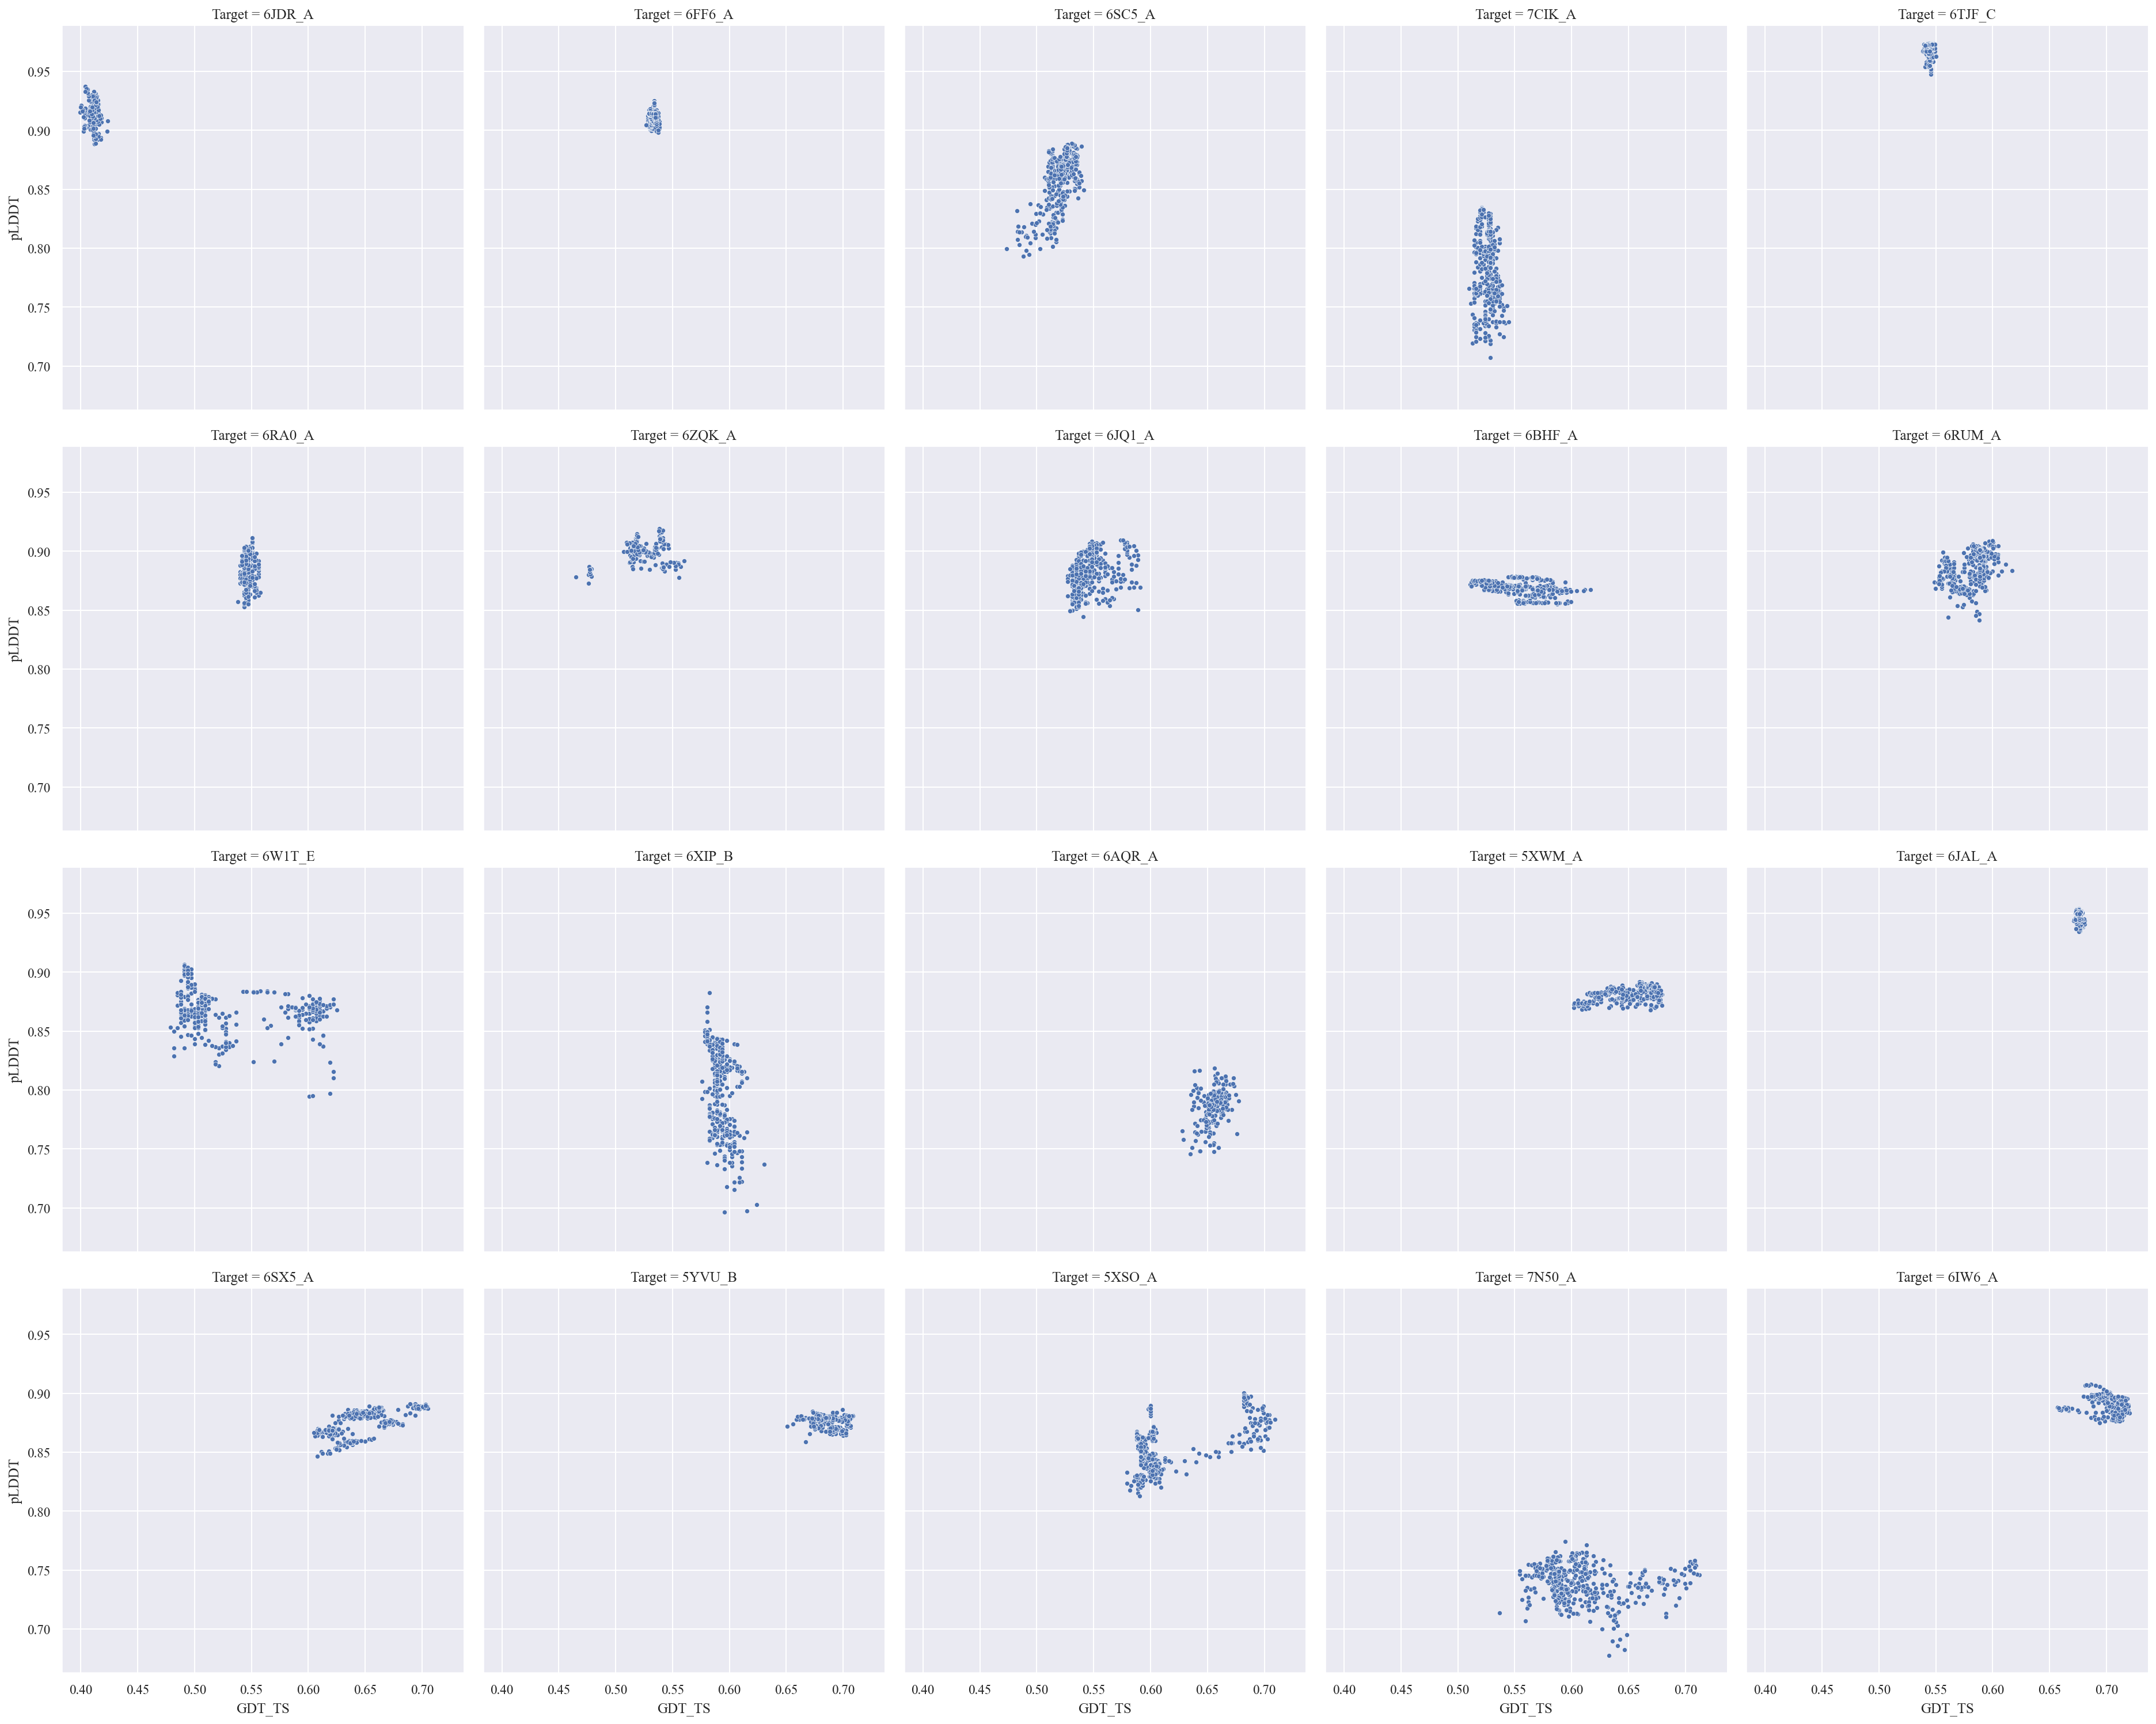

In [5]:
data = df.groupby('Target').filter(lambda x: x.name in sample_targets_low_max_gdtts)
method = 'pLDDT'
label = 'GDT_TS'
x, y = label, method
sns.relplot(data=data, x=x, y=y, kind='scatter', col='Target', col_wrap=5, col_order=sample_targets_low_max_gdtts, s=15)

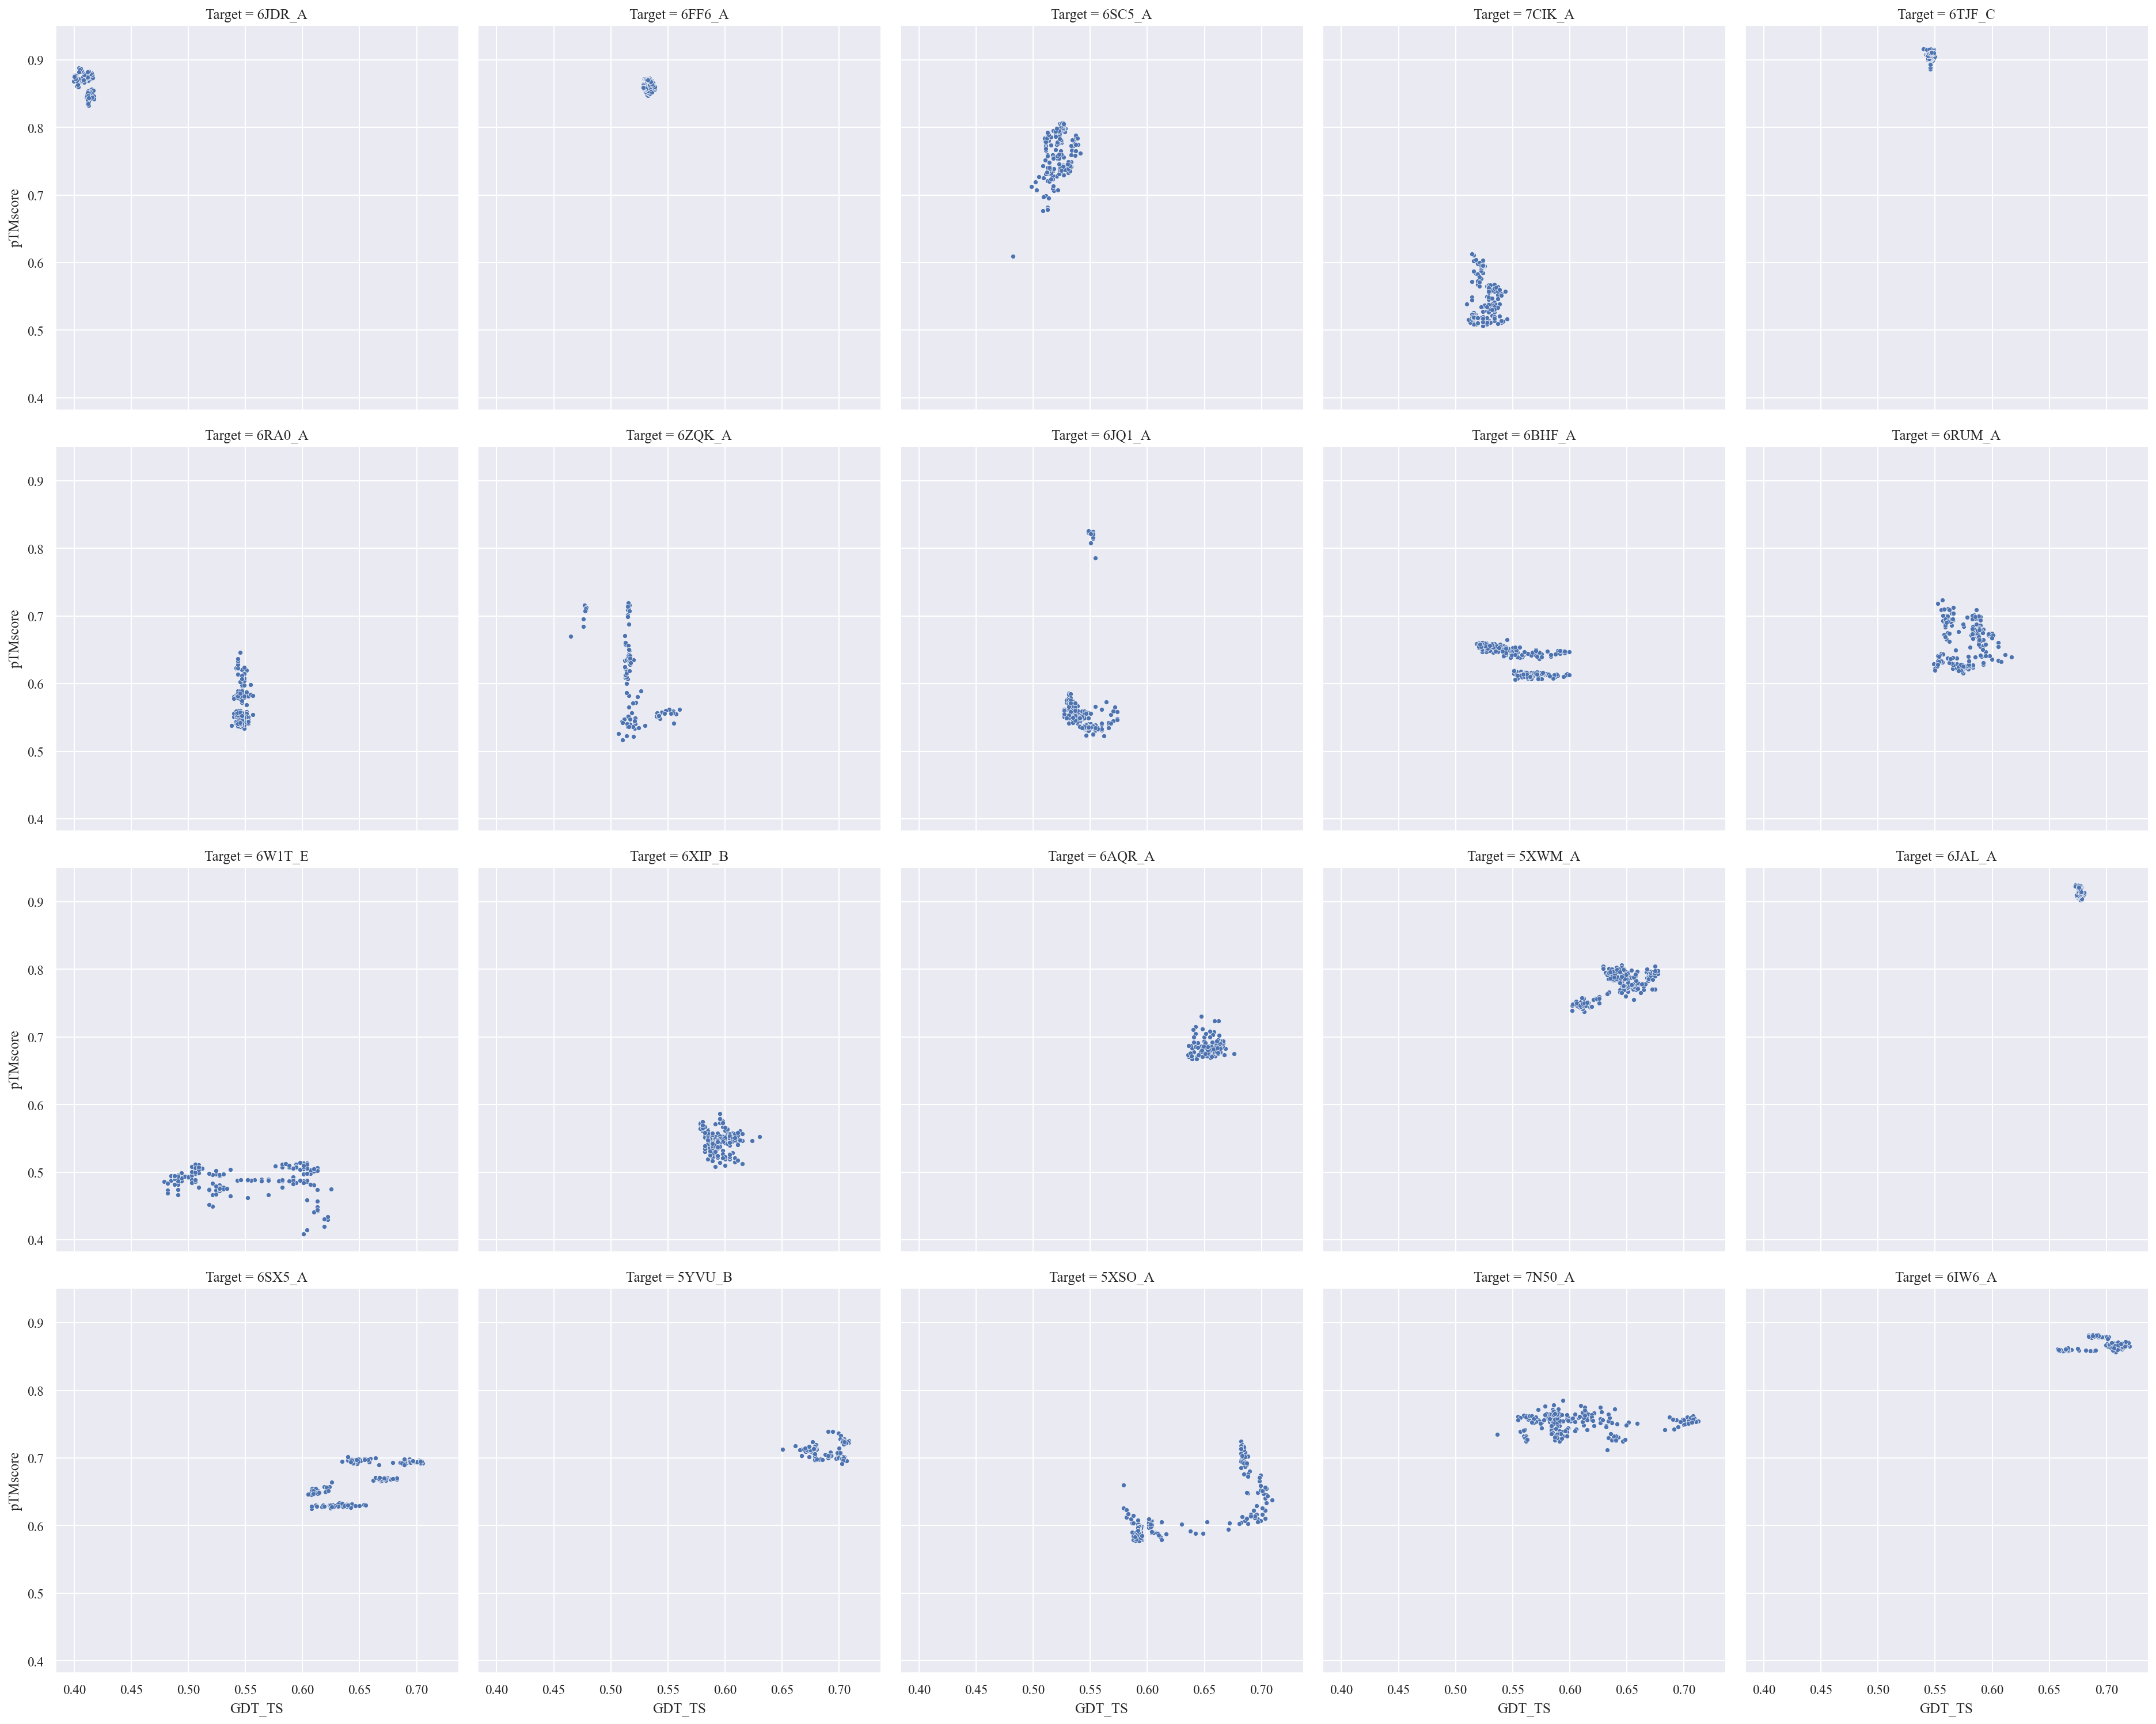

In [6]:
data = df.groupby('Target').filter(lambda x: x.name in sample_targets_low_max_gdtts)
method = 'pTMscore'
label = 'GDT_TS'
x, y = label, method
sns.relplot(data=data, x=x, y=y, kind='scatter', col='Target', col_wrap=5, col_order=sample_targets_low_max_gdtts, s=15)

## Targets with a low GDT_TS model

In [7]:
label = 'GDT_TS'
target_num = 20
gdtts_min_df = df.groupby('Target').apply(lambda x: x.loc[x[label].idxmin()]).sort_values(label)
display(gdtts_min_df.head(target_num))
sample_targets_with_low_gdtts = gdtts_min_df.head(target_num).index.to_list()

,Model,TMscore,GDT_TS,GDT_HA,Global_LDDT,Mean_LDDT,pLDDT,pTMscore,Tolerance,ModelName,...,Length,id,resolution,releasedate,header,sequence,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2
Target,,,,,,,,,,,,,,,,,,,,,
6Z5H_AAA,model_4_ptm_seed_1_rec_1_ens_1,0.422,0.352,0.301,0.619,0.632,0.683,0.445,49.993,model_4_ptm,...,628,6Z5H_AAA,2.300,2020-06-24T00:00:00Z,>6z5h_AAA mol:protein length:628 Exotoxin,MHHHHHHENLYFQGADESFNLWQECATRCTLDLAQGVRASQLDVAS...,628,4,2,True
6XW2_A,model_5_seed_1_rec_1_ens_1,0.469,0.360,0.263,0.563,0.591,0.600,NaN,41.656,model_5,...,459,6XW2_A,1.750,2020-01-29T00:00:00Z,>6xw2_A mol:protein length:459 Genetically en...,MGGSHHHHHHGMASMTGGQQMGRDLYDDDDKENLYFQGHMRSMVSK...,459,1,1,False
6JDR_A,model_5_ptm_seed_1_rec_10_ens_1,0.498,0.399,0.312,0.808,0.797,0.915,0.868,0.036,model_5_ptm,...,441,6JDR_A,2.500,2020-02-05T00:00:00Z,>6jdr_A mol:protein length:441 PP1b,GKKSRMCGYCGAPAPYATACGLDVCVYHTHFHQHCPVIIWCGHPAG...,441,2,2,False
6HYG_A,model_1_ptm_seed_0_rec_1_ens_1,0.498,0.400,0.316,0.804,0.813,0.823,0.455,43.324,model_1_ptm,...,492,6HYG_A,2.310,2019-03-13T00:00:00Z,>6hyg_A mol:protein length:492 IgHG1 and IgHG...,DKTHTCPSCPAPEFLGGPSVFLFPPKPKDTLMISRTPEVTCVVVDV...,492,1,1,False
6E3A_A,model_4_ptm_seed_1_rec_3_ens_1,0.510,0.425,0.310,0.622,0.636,0.793,0.798,3.662,model_4_ptm,...,182,6E3A_A,1.400,2019-03-20T00:00:00Z,>6e3a_A mol:protein length:182 Probable RNA 2...,MVLIDYSKLSKEVAYALRHAPWEYGLELDAEGWVDINQLLSSLHEC...,182,1,1,False
6ZQK_A,model_1_ptm_seed_1_rec_1_ens_1,0.510,0.465,0.393,0.804,0.818,0.878,0.670,39.775,model_1_ptm,...,469,6ZQK_A,2.200,2021-06-30T00:00:00Z,>6zqk_A mol:protein length:469 841 heavy chain,EVQLVESGGGLVQPGGSLRLSCAASGFNIKDTYIHWVRQAPGKGLE...,469,2,2,False
6SC5_A,model_5_seed_1_rec_1_ens_1,0.564,0.473,0.359,0.778,0.781,0.799,NaN,54.530,model_5,...,376,6SC5_A,2.100,2019-11-27T00:00:00Z,>6sc5_A mol:protein length:376 E3 ubiquitin-p...,QECAVCGWALPHNRMQALTSCECTICPDCFRQHFTIALKEKHITDM...,376,7,5,True
6RGV_A,model_1_seed_1_rec_1_ens_1,0.555,0.473,0.388,0.822,0.814,0.840,NaN,56.031,model_1,...,431,6RGV_A,2.000,2020-03-11T00:00:00Z,>6rgv_A mol:protein length:431 Flagellin,MGSSHHHHHHSSGLVPRGSHMASTANIKGLTQASRNANDGISIAQT...,431,4,1,True
6W1T_E,model_5_ptm_seed_0_rec_2_ens_8,0.440,0.479,0.348,0.679,0.706,0.853,0.486,1.281,model_5_ptm,...,84,6W1T_E,2.010,2020-05-13T00:00:00Z,>6w1t_E mol:protein length:84 Cytochrome b559...,MAGTTGERPFSDIITSVRYWVIHSITIPALFIAGWLFVSTGLAYDV...,84,162,77,True


In [8]:
set(sample_targets_with_low_gdtts) - set(sample_targets_low_max_gdtts)

{'6E3A_A', '6HYG_A', '6RGV_A', '6VCI_C', '6XW2_A', '6Z5H_AAA'}

## Targets with low GDT_TS and high mean-LDDT

In [9]:
df.query('GDT_TS < 0.6 and Mean_LDDT > 0.8')['Target'].unique()

array(['6RGV_A', '6SC5_A', '5XSO_A', '6FF6_A', '6XW2_A', '6TJF_C',
       '6E3A_A', '6RUM_A', '6HYG_A', '6JQ1_A', '6BHF_A', '6JDR_A',
       '6ZQK_A'], dtype=object)